# Documentation for Standard BDT
- ROC AUC for different masses
- learning curve
- validation curves

# Standard imports

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import HpAlgorithms
import HpMLUtils
import HpMLPlots
import HpHyperParameterOptimisation
import HpTrainingFrame

In [2]:
region="ge6jge4b"

In [ ]:
#! wget https://jglatzer.web.cern.ch/jglatzer/hpml/pandas_INC_ge6jge4b.h5

In [4]:
df_mc=pd.read_hdf('pandas_INC_'+region+'.h5', 'INC_'+region)

# Prepare data for H+ classification

split into test and training data

In [4]:
clf=HpAlgorithms.getGradientBDTClassifier()#options={"n_estimators":10})

In [5]:
htf=HpTrainingFrame.HpTrainingFrame(df_mc) 

# Getting the ROC AUC for all mass points (for a baseline)

In [6]:
from joblib import dump
hpmasses=[200,225,250,275,300,350,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000]
print("1-ROC AUC for different masses in "+region+" - test, train")
trainvalues=[]
testvalues=[]
for hpmass in hpmasses:
    X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass)
    opt=HpHyperParameterOptimisation.HpOptimise('StandardBDT'+region+'Hp'+str(hpmass)+'_train2mod0',clf,X_train,y_train,w_train,X_test,y_test,w_test)
    test,train=opt.trainAndTest(silent=True)
    dump(clf, 'models/standardBDT_'+str(hpmass)+'_'+region+'_train2mod0.joblib') 
    trainvalues.append(train)
    testvalues.append(test)
    print(hpmass, test, train)

1-ROC AUC for different masses in ge6jge4b - test, train
200 0.3290842221951199 0.2240520621012424
225 0.3566889077706463 0.21579328686568933
250 0.36026598934664733 0.21995695678445515
275 0.3449842931998113 0.21217694431592948
300 0.3395256720280394 0.20739127870676244
350 0.32019294400406406 0.2026950339984409
400 0.2922575016913834 0.1928953231742092
500 0.23146465705587116 0.17193524090058532
600 0.1869794113255031 0.14299887056654903
700 0.14718151569833804 0.11455979181045572
800 0.11895877153889589 0.09314935763424692
900 0.09204229751660797 0.07911450526235841
1000 0.08130818026304054 0.0672907706286362
1200 0.05375165458564901 0.045868995520269684
1400 0.0392281663907621 0.031634566730300295
1600 0.028362312548844804 0.023632745809650246
1800 0.02225413977221058 0.017101605387959018
2000 0.01605724612163162 0.01334001570575083


In [7]:
print("1-ROC AUC for different masses in "+region+" - train, test")

for hpmass in hpmasses:
    X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass)
    opt=HpHyperParameterOptimisation.HpOptimise('StandardBDT'+region+'Hp'+str(hpmass)+'_train2mod1',clf,X_test,y_test,w_test,X_train,y_train,w_train)
    test,train=opt.trainAndTest(silent=True)
    dump(clf, 'models/standardBDT_'+str(hpmass)+'_'+region+'_train2mod1.joblib') 
    print(hpmass, test, train)

1-ROC AUC for different masses in ge6jge4b - train, test
200 0.3287518222634984 0.2191869386383345
225 0.34794118725544654 0.21067230189403396
250 0.35324870942379005 0.2189581255230707
275 0.35090335353902324 0.2017447253209408
300 0.34840959598587384 0.20712931090913977
350 0.33084879584609006 0.20162028345698957
400 0.29548296794146034 0.18839439509855405
500 0.24418447721299852 0.1614378447995769
600 0.1954217291982061 0.1347598042374608
700 0.15025158935872795 0.11186801249216882
800 0.12146924817388605 0.09310458759933393
900 0.10112127621073741 0.07460609085101377
1000 0.08224042512151497 0.06582549238363411
1200 0.05378086379551128 0.04435750961317475
1400 0.03889512181512056 0.03196771185813485
1600 0.028889692338040507 0.023318391594928878
1800 0.02122383630612068 0.018802384186942245
2000 0.017090510370777245 0.013559346715569687


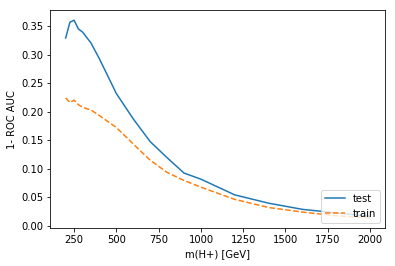

In [8]:
plt.plot(hpmasses, testvalues, '-', label='test')
plt.plot(hpmasses, trainvalues, '--', label='train')
plt.xlabel('m(H+) [GeV]')
plt.ylabel('1- ROC AUC')
plt.legend(loc="lower right")

# Hyperparameter Optimisation for m($H^{+}$)=800 GeV
We optimize for m(H+)=800 GeV and hope it holds more generally

In [9]:
X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass="800")
opt=HpHyperParameterOptimisation.HpOptimise("StandardBDT'+region+'mHp800",clf,X_train,y_train,w_train,X_test,y_test,w_test)

## draw the ROC curve

starting training
training done


/eos/user/j/jglatzer/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


Saving plot as  roccurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_n_iter_no_changeNone_presortauto_random_state0_subsample10_tol00001_validation_fraction01_verbose0_warm_startFalse.png


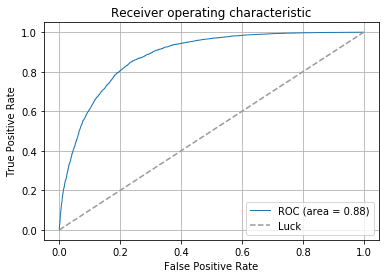

In [10]:
opt.saveROCCurve(fit=True)

## draw the learning curve

first for signal and background

Saving plot as  learningcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_n_iter_no_changeNone_presortauto_random_state0_subsample10_tol00001_validation_fraction01_verbose0_warm_startFalse.png


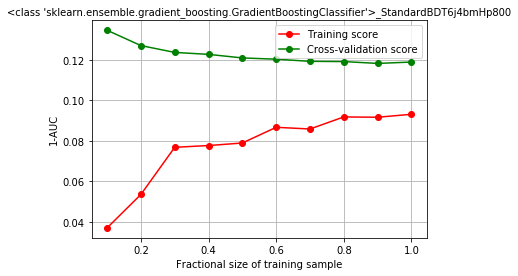

In [11]:
opt.saveLearningCurve()

then for signal only

Saving plot as  learningcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_n_iter_no_changeNone_presortauto_random_state0_subsample10_tol00001_validation_fraction01_verbose0_warm_startFalse.png


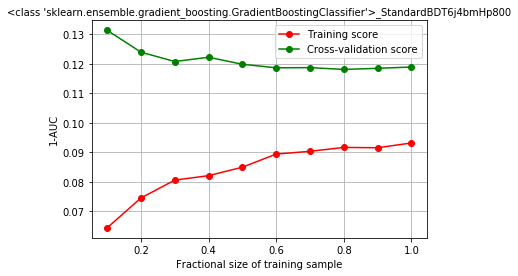

In [12]:
opt.saveLearningCurve(category=1)

then for background only

Saving plot as  learningcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_criterionfriedman_mse_initNone_learning_rate013_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_n_iter_no_changeNone_presortauto_random_state0_subsample10_tol00001_validation_fraction01_verbose0_warm_startFalse.png


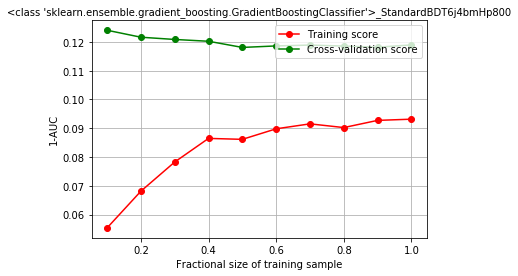

In [13]:
opt.saveLearningCurve(category=0)

## draw the validation curves

Validation curve for learning_rate
Training for  0.05
Training for  0.1
Training for  0.13
Training for  0.2
Training for  0.5
Saving plot as  validationcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_learning_rate_criterionfriedman_mse_initNone_learning_rate05_lossdeviance_max_depth5_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_n_iter_no_changeNone_presortauto_random_state0_subsample10_tol00001_validation_fraction01_verbose0_warm_startFalse.png
Validation curve for max_depth
Training for  3
Training for  4
Training for  5
Training for  6
Saving plot as  validationcurve_GradientBoostingClassifier_StandardBDT6j4bmHp800_max_depth_criterionfriedman_mse_initNone_learning_rate05_lossdeviance_max_depth6_max_featuresNone_max_leaf_nodesNone_min_impurity_decrease00_min_impurity_splitNone_min_samples_leaf1_min_samples_split2_min_weight_fraction_leaf001_n_estimators120_n_i

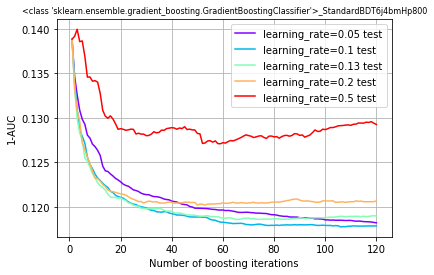

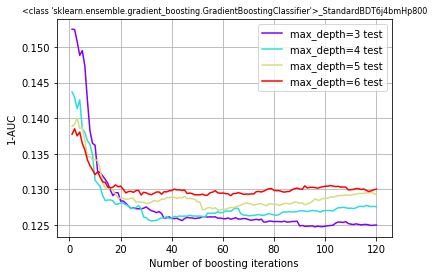

In [14]:
opt.saveAllValidationCurves()